## 泰坦尼克生还分类
1. Survive与其他变量的关系
2. 缺失值填充
3. 数据标准化
4. 类别变量 -> get_dummies
5. lr
6. xgboost

In [3]:
import numpy as np
import pandas as pd

In [4]:
df_train = pd.read_csv('train.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_test = pd.read_csv('test.csv')
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'SimHei'

/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


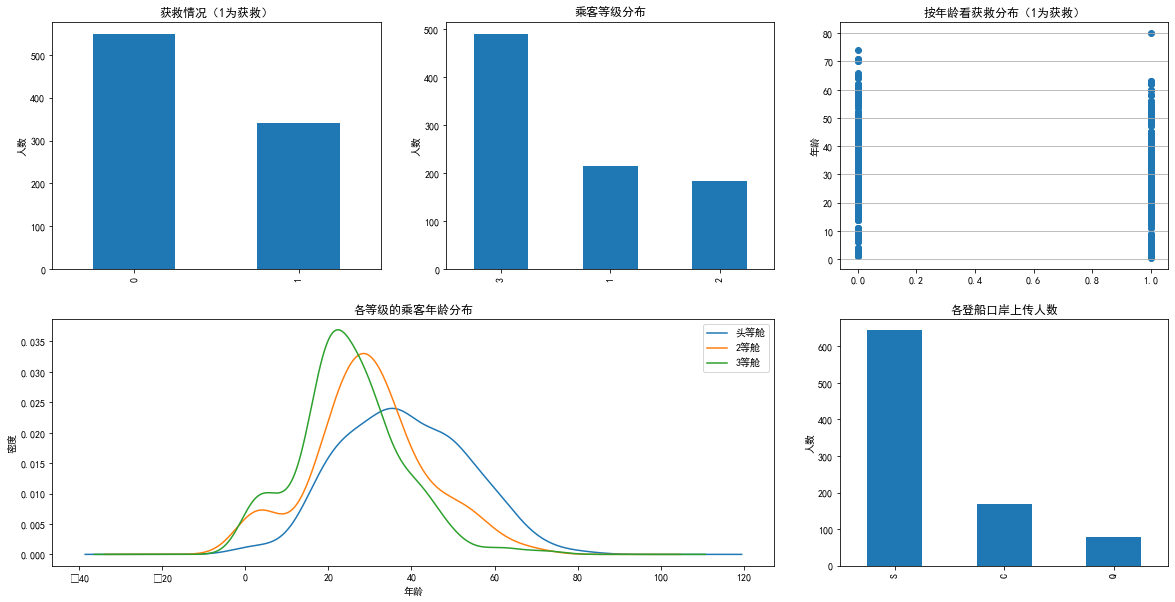

In [10]:
fig = plt.figure(figsize=[20,10])

plt.subplot2grid((2,3),(0,0))
df_train.Survived.value_counts().plot(kind='bar')
plt.title(u"获救情况（1为获救）")
plt.ylabel(u"人数")

plt.subplot2grid((2,3),(0,1))
df_train.Pclass.value_counts().plot(kind='bar')
plt.title(u"乘客等级分布")
plt.ylabel(u"人数")

plt.subplot2grid((2,3),(0,2))
plt.scatter(df_train.Survived, df_train.Age)
plt.ylabel(u"年龄")
plt.grid(b=True, which='major', axis='y')
plt.title(u"按年龄看获救分布（1为获救）")

plt.subplot2grid((2,3),(1,0),colspan=2)
df_train.Age[df_train.Pclass == 1].plot(kind='kde')
df_train.Age[df_train.Pclass == 2].plot(kind='kde')
df_train.Age[df_train.Pclass == 3].plot(kind='kde')
plt.title(u"各等级的乘客年龄分布")
plt.xlabel(u"年龄")
plt.ylabel(u"密度")
plt.legend((u"头等舱", u"2等舱", u"3等舱"), loc='best')

plt.subplot2grid((2,3),(1,2))
df_train.Embarked.value_counts().plot(kind='bar')
plt.title(u"各登船口岸上传人数")
plt.ylabel(u"人数")
plt.show()

<Figure size 1440x360 with 0 Axes>

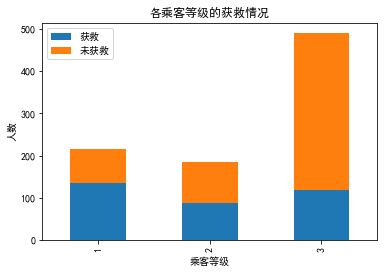

In [11]:
fig = plt.figure(figsize=[20,5])

Survived_0 = df_train.Pclass[df_train.Survived == 0].value_counts()
Survived_1 = df_train.Pclass[df_train.Survived == 1].value_counts()
df = pd.DataFrame({u'获救': Survived_1,
                  u'未获救': Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"各乘客等级的获救情况")
plt.xlabel(u"乘客等级")
plt.ylabel(u"人数")
plt.show()

<Figure size 1440x360 with 0 Axes>

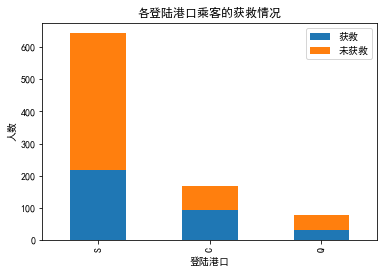

In [12]:
fig = plt.figure(figsize=[20,5])

Survived_0 = df_train.Embarked[df_train.Survived == 0].value_counts()
Survived_1 = df_train.Embarked[df_train.Survived == 1].value_counts()
df = pd.DataFrame({u'获救': Survived_1,
                  u'未获救': Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"各登陆港口乘客的获救情况")
plt.xlabel(u"登陆港口")
plt.ylabel(u"人数")
plt.show()

<Figure size 1440x360 with 0 Axes>

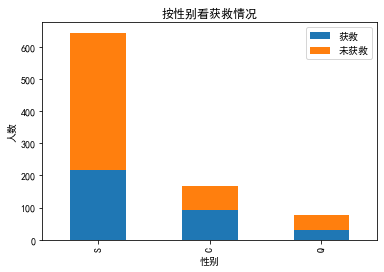

In [13]:
fig = plt.figure(figsize=[20,5])

Survived_m = df_train.Survived[df_train.Sex == 'male'].value_counts()
Survived_f = df_train.Survived[df_train.Sex == 'female'].value_counts()
df = pd.DataFrame({u'获救': Survived_1,
                  u'未获救': Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"按性别看获救情况")
plt.xlabel(u"性别")
plt.ylabel(u"人数")
plt.show()

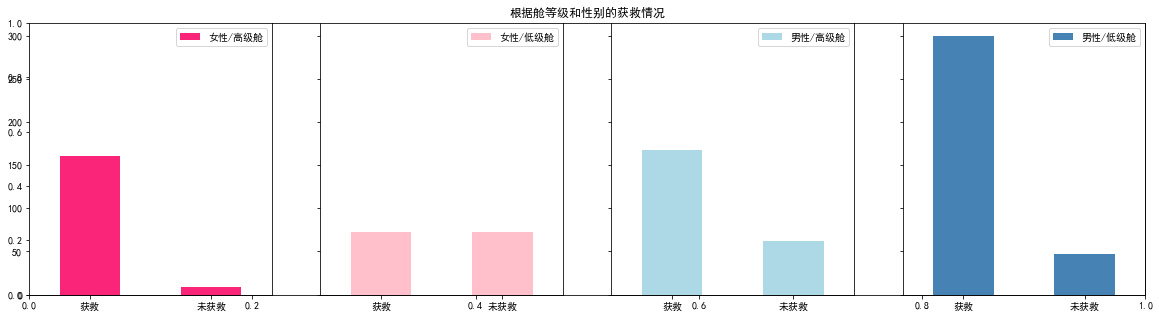

In [14]:
fig = plt.figure(figsize=[20,5])
plt.title(u"根据舱等级和性别的获救情况")

ax1 = fig.add_subplot(141)
df_train.Survived[df_train.Sex == 'female'][df_train.Pclass != 3].value_counts().plot(kind='bar', label='female highclass', color='#FA2479')
ax1.set_xticklabels([u"获救",u"未获救"], rotation=0)
ax1.legend([u'女性/高级舱'], loc='best')

ax2 = fig.add_subplot(142, sharey=ax1)
df_train.Survived[df_train.Sex == 'female'][df_train.Pclass == 3].value_counts().plot(kind='bar', label='female lowclass', color='pink')
ax2.set_xticklabels([u"获救",u"未获救"], rotation=0)
ax2.legend([u'女性/低级舱'], loc='best')

ax3 = fig.add_subplot(143, sharey=ax1)
df_train.Survived[df_train.Sex == 'male'][df_train.Pclass != 3].value_counts().plot(kind='bar', label='male highclass', color='lightblue')
ax3.set_xticklabels([u"获救",u"未获救"], rotation=0)
ax3.legend([u'男性/高级舱'], loc='best')

ax4 = fig.add_subplot(144, sharey=ax1)
df_train.Survived[df_train.Sex == 'male'][df_train.Pclass == 3].value_counts().plot(kind='bar', label='male lowclass', color='steelblue')
ax4.set_xticklabels([u"获救",u"未获救"], rotation=0)
ax4.legend([u'男性/低级舱'], loc='best')

plt.show()

In [16]:
g = df_train.groupby(['SibSp', 'Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
df

PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7

In [17]:
g = df_train.groupby(['Parch', 'Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
df

PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1

In [18]:
df_train.Cabin.value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
E101           3
C22 C26        3
              ..
B80            1
E31            1
C128           1
A10            1
C46            1
Name: Cabin, Length: 147, dtype: int64

<Figure size 1440x360 with 0 Axes>

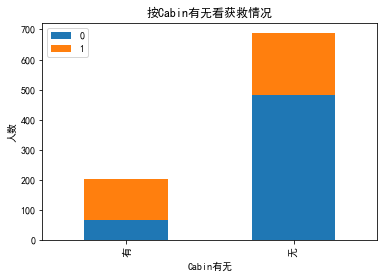

In [19]:
fig = plt.figure(figsize=[20,5])

Survived_cabin = df_train.Survived[pd.notnull(df_train.Cabin)].value_counts()
Survived_nocabin = df_train.Survived[pd.isnull(df_train.Cabin)].value_counts()
df = pd.DataFrame({u'有': Survived_cabin,
                  u'无': Survived_nocabin}).transpose()
df.plot(kind='bar', stacked=True)
plt.title(u"按Cabin有无看获救情况")
plt.xlabel(u"Cabin有无")
plt.ylabel(u"人数")
plt.show()

In [21]:
from sklearn.ensemble import RandomForestRegressor

def set_missing_ages(df):
    age_df = df[['Age','Fare','Parch','SibSp','Pclass']]
    
    known_age = age_df[age_df.Age.notnull()]
    unknown_age = age_df[age_df.Age.isnull()]
    
    y = known_age.iloc[:,0]
    X = known_age.iloc[:,1:]
    
    rfr = RandomForestRegressor(random_state=0,
                               n_estimators=2000,
                               n_jobs=-1)
    rfr.fit(X, y)
    
    predictedAges = rfr.predict(unknown_age.iloc[:,1:])
    df.loc[(df.Age.isnull()), 'Age'] = predictedAges
    
    return df, rfr

def set_Cabin_type(df):
    df.loc[(df.Cabin.notnull()),'Cabin'] = 'Yes'
    df.loc[(df.Cabin.isnull()),'Cabin'] = 'No'
    return df

df_train, rfr = set_missing_ages(df_train)
df_train = set_Cabin_type(df_train)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,No,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,No,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,Yes,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,16.19395,1,2,W./C. 6607,23.4500,No,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,Yes,C


In [22]:
dummies_Cabin = pd.get_dummies(df_train['Cabin'], prefix='Cabin')
dummies_Embarked = pd.get_dummies(df_train['Embarked'], prefix='Embarked')
dummies_Sex = pd.get_dummies(df_train['Sex'], prefix='Sex')
dummies_Pclass = pd.get_dummies(df_train['Pclass'], prefix='Pclass')

df = pd.concat([df_train,dummies_Cabin,dummies_Embarked,dummies_Sex,dummies_Pclass], axis=1)
df.drop(['Pclass','Name','Sex','Ticket','Cabin','Embarked'], axis=1, inplace=True)
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.00000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,2,1,38.00000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0
2,3,1,26.00000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1
3,4,1,35.00000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0
4,5,0,35.00000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.00000,0,0,13.0000,1,0,0,0,1,0,1,0,1,0
887,888,1,19.00000,0,0,30.0000,0,1,0,0,1,1,0,1,0,0
888,889,0,16.19395,1,2,23.4500,1,0,0,0,1,1,0,0,0,1
889,890,1,26.00000,0,0,30.0000,0,1,1,0,0,0,1,1,0,0


In [23]:
from sklearn.preprocessing import StandardScaler

sc_age = StandardScaler().fit(df['Age'].values.reshape(-1,1))
df['Age_scaled'] = sc_age.transform(df['Age'].values.reshape(-1,1))
sc_fare = StandardScaler().fit(df['Fare'].values.reshape(-1,1))
df['Fare_scaled'] = sc_fare.transform(df['Fare'].values.reshape(-1,1))

df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0,22.00000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1,-0.561380,-0.502445
1,2,1,38.00000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0,0.613171,0.786845
2,3,1,26.00000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1,-0.267742,-0.488854
3,4,1,35.00000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0,0.392942,0.420730
4,5,0,35.00000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,0.392942,-0.486337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.00000,0,0,13.0000,1,0,0,0,1,0,1,0,1,0,-0.194333,-0.386671
887,888,1,19.00000,0,0,30.0000,0,1,0,0,1,1,0,1,0,0,-0.781608,-0.044381
888,889,0,16.19395,1,2,23.4500,1,0,0,0,1,1,0,0,0,1,-0.987599,-0.176263
889,890,1,26.00000,0,0,30.0000,0,1,1,0,0,0,1,1,0,0,-0.267742,-0.044381


In [25]:
from sklearn.linear_model import LogisticRegression

y_train = df['Survived']
x_train = df.drop(['PassengerId','Survived','Age','Fare'], axis=1)

In [26]:
clf = LogisticRegression()
clf.fit(x_train, y_train)

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(clf, x_train, y_train)

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py

In [28]:
train_sizes

array([ 59, 193, 326, 460, 594])

In [29]:
train_scores

array([[0.89830508, 0.89830508, 0.89830508],
       [0.8238342 , 0.86010363, 0.86010363],
       [0.82208589, 0.79754601, 0.80981595],
       [0.82608696, 0.80434783, 0.80869565],
       [0.81649832, 0.80808081, 0.80808081]])

In [30]:
test_scores

array([[0.78787879, 0.79461279, 0.8047138 ],
       [0.7979798 , 0.81818182, 0.78787879],
       [0.8047138 , 0.8013468 , 0.8013468 ],
       [0.80808081, 0.80808081, 0.8047138 ],
       [0.8047138 , 0.7979798 , 0.81818182]])

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


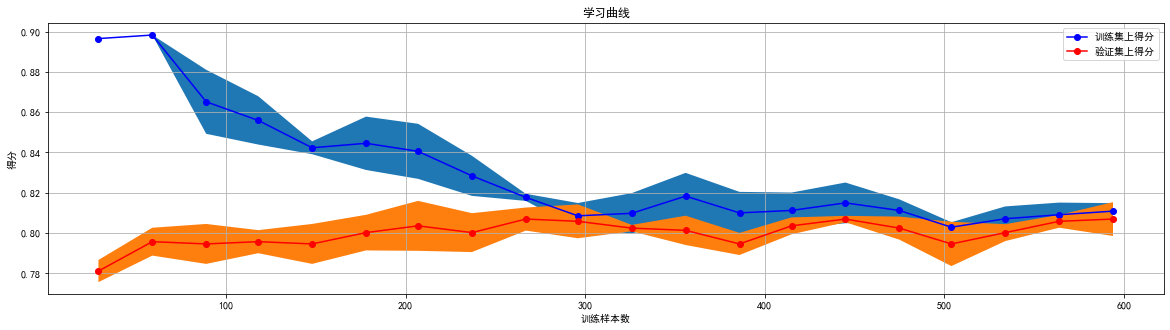

(0.8067071936769836, 0.016295004129607826)

In [37]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(0.05,1.0,20), verbose=0, plot=True):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose, scoring='accuracy')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    if plot:
        plt.figure(figsize=[20,5])
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"训练样本数")
        plt.ylabel(u"得分")
        plt.gca().invert_yaxis()
        plt.grid()
        
        plt.fill_between(train_sizes, train_scores_mean-train_scores_std, train_scores_mean+train_scores_std)
        plt.fill_between(train_sizes, test_scores_mean-test_scores_std, test_scores_mean+test_scores_std)
        plt.plot(train_sizes, train_scores_mean, 'o-', color='b', label=u'训练集上得分')
        plt.plot(train_sizes, test_scores_mean, 'o-', color='r', label=u'验证集上得分')
        plt.legend(loc='best')
        plt.draw()
        plt.gca().invert_yaxis()
        plt.show()
        
    midpoint = ((train_scores_mean[-1]+train_scores_std[-1])+(test_scores_mean[-1]-test_scores_std[-1]))/2
    diff = (train_scores_mean[-1]+train_scores_std[-1])-(test_scores_mean[-1]-test_scores_std[-1])
    return midpoint, diff

plot_learning_curve(clf, u"学习曲线", x_train, y_train)

In [43]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [44]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [46]:
df_test.Fare[np.isnan(df_test.Fare)] = 0
# df_test.loc[(data_test.Fare.isnull()),'Fare'] = 0

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [52]:
df_test = pd.read_csv('test.csv')
df_test.loc[(df_test.Fare.isnull()), 'Fare'] = 0

tmp_df = df_test[['Age','Fare','Parch','SibSp','Pclass']]
null_age = tmp_df[df_test.Age.isnull()]
X = null_age.iloc[:,1:]
predictedAges = rfr.predict(X)
df_test.loc[(df_test.Age.isnull()),'Age'] = predictedAges

df_test = set_Cabin_type(df_test)
dummies_Cabin = pd.get_dummies(df_test['Cabin'], prefix='Cabin')
dummies_Embarked = pd.get_dummies(df_test['Embarked'], prefix='Embarked')
dummies_Sex = pd.get_dummies(df_test['Sex'], prefix='Sex')
dummies_Pclass = pd.get_dummies(df_test['Pclass'], prefix='Pclass')

df_test = pd.concat([df_test,dummies_Cabin,dummies_Embarked,dummies_Sex,dummies_Pclass], axis=1)
df_test.drop(['Pclass','Name','Sex','Ticket','Cabin','Embarked'], axis=1, inplace=True)
df_test['Age_scaled'] = sc_age.transform(df_test['Age'].values.reshape(-1,1))
df_test['Fare_scaled'] = sc_fare.transform(df_test['Fare'].values.reshape(-1,1))
df_test

,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,892,34.500000,0,0,7.8292,1,0,0,1,0,0,1,0,0,1,0.356238,-0.490783
1,893,47.000000,1,0,7.0000,1,0,0,0,1,1,0,0,0,1,1.273856,-0.507479
2,894,62.000000,0,0,9.6875,1,0,0,1,0,0,1,0,1,0,2.374997,-0.453367
3,895,27.000000,0,0,8.6625,1,0,0,0,1,0,1,0,0,1,-0.194333,-0.474005
4,896,22.000000,1,1,12.2875,1,0,0,0,1,1,0,0,0,1,-0.561380,-0.401017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,30.705727,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,0.077702,-0.486337
414,1306,39.000000,0,0,108.9000,0,1,1,0,0,1,0,1,0,0,0.686580,1.544246
415,1307,38.500000,0,0,7.2500,1,0,0,0,1,0,1,0,0,1,0.649875,-0.502445
416,1308,30.705727,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,0.077702,-0.486337


In [61]:
x_test = df_test.drop(['PassengerId','Age','Fare'], axis=1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
result = pd.DataFrame({'PassengerId': list(df_test['PassengerId']),
                      'Survived': list(y_pred)})
result.to_csv('lr01.csv', index=False)

In [62]:
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [63]:
from xgboost import XGBClassifier

In [70]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# df_train

In [71]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [72]:
df_train, rfr = set_missing_ages(df_train)
df_train = set_Cabin_type(df_train)

In [78]:
dummies_Cabin = pd.get_dummies(df_train['Cabin'], prefix='Cabin')
dummies_Embarked = pd.get_dummies(df_train['Embarked'], prefix='Embarked')
dummies_Sex = pd.get_dummies(df_train['Sex'], prefix='Sex')
dummies_Pclass = pd.get_dummies(df_train['Pclass'], prefix='Pclass')

In [79]:
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0,22.00000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1,-0.561380,-0.502445
1,2,1,38.00000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0,0.613171,0.786845
2,3,1,26.00000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1,-0.267742,-0.488854
3,4,1,35.00000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0,0.392942,0.420730
4,5,0,35.00000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,0.392942,-0.486337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.00000,0,0,13.0000,1,0,0,0,1,0,1,0,1,0,-0.194333,-0.386671
887,888,1,19.00000,0,0,30.0000,0,1,0,0,1,1,0,1,0,0,-0.781608,-0.044381
888,889,0,16.19395,1,2,23.4500,1,0,0,0,1,1,0,0,0,1,-0.987599,-0.176263
889,890,1,26.00000,0,0,30.0000,0,1,1,0,0,0,1,1,0,0,-0.267742,-0.044381


In [89]:
x_train = df[['Age','SibSp','Parch','Fare','Cabin_No','Cabin_Yes','Embarked_C','Embarked_Q','Embarked_S','Sex_female','Sex_male','Pclass_1','Pclass_2','Pclass_3']]
y_trian = df['Survived']

df_test = pd.read_csv('test.csv')
df_test.loc[(df_test.Fare.isnull()), 'Fare'] = 0

tmp_df = df_test[['Age','Fare','Parch','SibSp','Pclass']]
null_age = tmp_df[df_test.Age.isnull()]
X = null_age.iloc[:,1:]
predictedAges = rfr.predict(X)
df_test.loc[(df_test.Age.isnull()),'Age'] = predictedAges

df_test = set_Cabin_type(df_test)
dummies_Cabin = pd.get_dummies(df_test['Cabin'], prefix='Cabin')
dummies_Embarked = pd.get_dummies(df_test['Embarked'], prefix='Embarked')
dummies_Sex = pd.get_dummies(df_test['Sex'], prefix='Sex')
dummies_Pclass = pd.get_dummies(df_test['Pclass'], prefix='Pclass')
df_test = pd.concat([df_test,dummies_Cabin,dummies_Embarked,dummies_Sex,dummies_Pclass], axis=1)
x_test = df_test[['Age','SibSp','Parch','Fare','Cabin_No','Cabin_Yes','Embarked_C','Embarked_Q','Embarked_S','Sex_female','Sex_male','Pclass_1','Pclass_2','Pclass_3']]

clf = XGBClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
result = pd.DataFrame({'PassengerId': list(df_test['PassengerId']),
                      'Survived': list(y_pred)})
result.to_csv('xgb01.csv', index=False)

In [90]:
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
